In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/kaggle/input/dataset3/text.csv')

In [4]:
data = pd.read_csv('/kaggle/input/dataset11/tweet_emotions.csv')

In [5]:
df.sample(3)
data.sample(3)

,tweet_id,sentiment,content
3148,1957712678,worry,2 hours after teleconference. but can't go bac...
23672,1694666371,fun,@mitchelmusso hey... Your on MY mind.
3414,1958043277,sadness,oooh battlestar galactica is on the other chan...


In [6]:
# Drop the 'Unnamed: 0' column and tweet_id from the tweet_data
#df = df.drop(columns=['Unnamed: 0'])
data = data.drop(columns=['tweet_id'])
# Check the first few rows of the updated dataset
print(df.head())
print(data.head())

   Unnamed: 0                                               text  label
0           0      i just feel really helpless and heavy hearted      4
1           1  ive enjoyed being able to slouch about relax a...      0
2           2  i gave up my internship with the dmrg and am f...      4
3           3                         i dont know i feel so lost      0
4           4  i am a kindergarten teacher and i am thoroughl...      4
    sentiment                                            content
0       empty  @tiffanylue i know  i was listenin to bad habi...
1     sadness  Layin n bed with a headache  ughhhh...waitin o...
2     sadness                Funeral ceremony...gloomy friday...
3  enthusiasm               wants to hang out with friends SOON!
4     neutral  @dannycastillo We want to trade with someone w...


In [7]:
print(df.info())
print(df['label'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  416809 non-null  int64 
 1   text        416809 non-null  object
 2   label       416809 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 9.5+ MB
None
label
1    141067
0    121187
3     57317
4     47712
2     34554
5     14972
Name: count, dtype: int64


In [8]:
import re

def preprocess_text(text):
    text = re.sub(r'@[\w]+', '', text)  # Remove mentions
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = text.lower().strip()  # Convert to lowercase
    return text

# Apply the function
data['cleaned_content'] = data['content'].apply(preprocess_text)


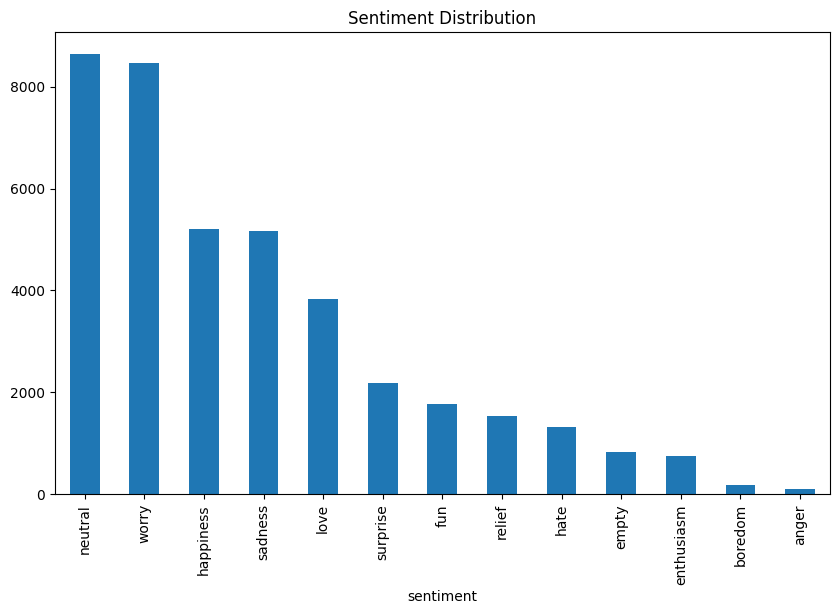

In [9]:
import matplotlib.pyplot as plt

data['sentiment'].value_counts().plot(kind='bar', figsize=(10, 6), title="Sentiment Distribution")
plt.show()


In [10]:
# List of sentiments to drop (add/remove sentiments as needed)
sentiments_to_drop = ['fun', 'boredom', 'empty', 'relief', 'neutral','sadness','hate','enthusiasm']

# Filter the dataset to exclude these sentiments
data = data[~data['sentiment'].isin(sentiments_to_drop)]

# Save the filtered dataset to a new file
data.to_csv('filtered_dataset.csv', index=False)

print("Filtered dataset saved as 'filtered_dataset.csv'")


Filtered dataset saved as 'filtered_dataset.csv'


In [11]:
data = pd.read_csv('filtered_dataset.csv')
data.sample(3)

,sentiment,content,cleaned_content
340,worry,I need to wake up earlier so I'm actually tire...,i need to wake up earlier so im actually tired...
5307,worry,@johnhayato I love Overnight. And they've work...,i love overnight and theyve worked with me on ...
15341,love,@NeSsIe_Cullen10 That's so nice to hear i lov...,thats so nice to hear i love you youre my bes...


In [12]:
data = data.drop(columns=['content'])

In [13]:
import pandas as pd


# Define the mapping for label encoding
label_mapping = {
    'worry': 0,
    'happiness': 1,
    'love': 2,
    'anger': 3,
    'surprise': 5
}

# Apply the mapping to the 'sentiment' column
data['sentiment_encoded'] = data['sentiment'].map(label_mapping)

# Save the updated dataset
data.to_csv('encoded_dataset.csv', index=False)

print("Dataset with encoded labels saved as 'encoded_dataset.csv'")


Dataset with encoded labels saved as 'encoded_dataset.csv'


In [14]:
data = pd.read_csv('encoded_dataset.csv')
data.sample(3)

,sentiment,cleaned_content,sentiment_encoded
17385,love,haha im jewish i love that one,2
11446,love,sounds like jeff has the best job in the world,2
11745,love,i love these clutches im lusting after one in ...,2


In [15]:
data = data.drop(columns=['sentiment'])

In [16]:
data.sample(3)

,cleaned_content,sentiment_encoded
13630,good morning everyone,2
18485,happy mothers day to all the twitter moms sent...,2
9727,i have a song suggestion anything from the ver...,2


In [17]:
df. sample(3)

,Unnamed: 0,text,label
105641,105641,im polyamorous something im starting to feel t...,2
276945,276945,i expected to feel nostalgic or wistful upon v...,2
343497,343497,i could feel more and more cold creep up,3


In [18]:
# Renaming columns to match before merging
data.rename(columns={'cleaned_content': 'text', 'sentiment_encoded': 'label'}, inplace=True)

# Concatenating the two datasets
merged_df = pd.concat([data[['text', 'label']], df[['text', 'label']]], ignore_index=True)

# Displaying the merged dataset
print(merged_df.head())


                                                text  label
0  repinging  why didnt you go to prom bc my bf d...      0
1                                      hmmm  is down      0
2                            choked on her retainers      0
3                                       got the news      5
4                                             agreed      2


In [19]:
# Save the merged DataFrame to a CSV file
merged_df.to_csv('merged_dataset.csv', index=False)

print("Merged dataset saved as 'merged_dataset.csv'")


Merged dataset saved as 'merged_dataset.csv'


In [20]:
df1 = pd.read_csv('/kaggle/working/merged_dataset.csv')

In [21]:
df1.sample(3)

,text,label
138441,i feel insecure and i dont know how else to te...,4
72105,i can t say sorry to anyone who feels disappoi...,0
61123,i kinda get the feeling that it is a really la...,0


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fill missing values in the 'text' column with an empty string
df1['text'] = df1['text'].fillna('')

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the 'text' column
X = vectorizer.fit_transform(df1['text'])

# Convert the result to a dense array (optional)
X_dense = X.toarray()

# Display the shape of the resulting numeric data
print("Shape of transformed text data:", X_dense.shape)


Shape of transformed text data: (436616, 5000)


In [23]:
from sklearn.model_selection import train_test_split

# Define the input features (X) and target labels (y)
y = df1['label']  # Target labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 349292
Testing set size: 87324


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8844189455361642

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92     26008
           1       0.90      0.92      0.91     29313
           2       0.80      0.72      0.76      7533
           3       0.91      0.89      0.90     11506
           4       0.85      0.85      0.85      9461
           5       0.76      0.64      0.70      3503

    accuracy                           0.88     87324
   macro avg       0.85      0.83      0.84     87324
weighted avg       0.88      0.88      0.88     87324



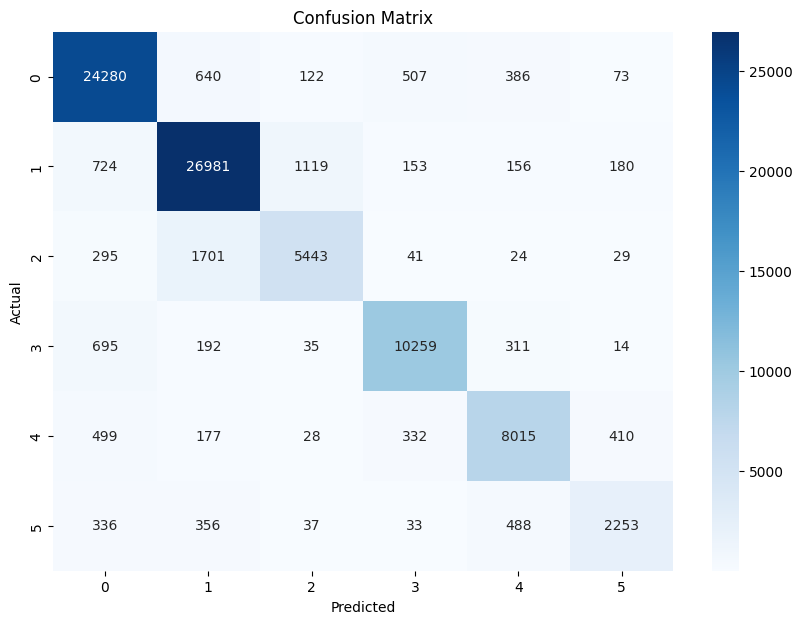

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [26]:
import joblib

# Save the model
joblib.dump(model, "my_model.pkl")
print("Model saved as logistic_regression_model.pkl")


Model saved as logistic_regression_model.pkl


In [27]:
# Load the model
loaded_model = joblib.load("my_model.pkl")
print("Model loaded successfully")

# Use the loaded model to predict
y_pred_loaded = loaded_model.predict(X_test)
print("Accuracy with loaded model:", accuracy_score(y_test, y_pred_loaded))


Model loaded successfully
Accuracy with loaded model: 0.8844189455361642


In [28]:
import joblib

# Save the original vectorizer used during training
joblib.dump(vectorizer, "vectorizer.pkl")
print("Original vectorizer saved successfully")


Original vectorizer saved successfully
